In [15]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import ndimage

In [2]:
!ls '../../../../'

AIforFinancialEngineering            deep_learning_workshop_2020
AgeMapper Analysis Prototype         dphil-latex-files
Analysis Male                        financial_engineering
Applications                         functionmapper
Courses                              functionmapper_data
Creative Cloud Files                 functionmapper_subject_data
Desktop                              functionmapper_test_data
Documents                            matlab_utils
Downloads                            mean_dr_stage2.nii.gz
Library                              model_codes
MONAI                                multi-age-mapper
MRI_Graduate_Program                 prob.txt
Movies                               research-contributions
Music                                seaborn-data
Pictures                             test_all.txt
Public                               train.txt
Sites                                validation.txt
SwinAgeMapper                        well
VIA                       

In [3]:
scaling_values = '../../../../SwinAgeMapper/datasets/scaling_values_simple.csv'
subject_path = '24237795'

In [24]:
class AddGaussianNoise(object):
    """
    Class adding gaussian noise to an input array
    """
    def __init__(self, 
                 mean: float = 0., 
                 std: float = 1.
                 ) -> None:

        self.std = std
        self.mean = mean
        
    def __call__(self, X: np.ndarray) -> np.ndarray:

        # return tensor + torch.randn(tensor.size()) * self.std + self.mean

        print(type(X))
        
        if self.std == 0 and self.mean == 0:
            print('-> Returning no noise', print(type(X)))
            return X
        else:
            print('-> Returning WITH noise', print(type(X)))
            return X + np.random.randn(X.size).reshape(X.shape) * self.std + self.mean
    
    def __repr__(self):

        if self.std == 0 and self.mean == 0:
            return "No noise has been added"
        else:
            return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    

In [34]:
modality_flag = 'T1_nonlinear'

scaling_values_simple = pd.read_csv(scaling_values, index_col=0)
scale_factor = scaling_values_simple.loc[modality_flag].scale_factor
# resolution = scaling_values_simple.loc[list(modality_flag)].resolution.to_list()

In [35]:
X_path = '../../../multi-age-mapper/additional_data_examples/' + subject_path + '/T1_brain_to_MNI.nii.gz'
X_volume = np.array(nib.load(X_path).dataobj)

In [36]:
crop_values = [10, 170, 12, 204, 0, 160]

X_volume = X_volume[crop_values[0]:crop_values[1],
                    crop_values[2]:crop_values[3], 
                    crop_values[4]:crop_values[5]]

X_volume = X_volume / X_volume.mean()

X_volume = X_volume / scale_factor



noise_transformation = None

if noise_transformation is not None:
    'NOISE WAS ADDED!!!'
    X_volume = noise_transformation(X_volume)

    

X_volume = torch.from_numpy(X_volume)

In [37]:
X1 = np.copy(X_volume)

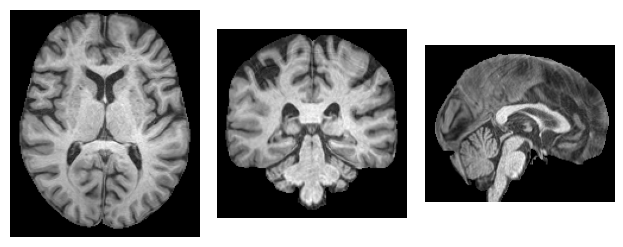

In [38]:
fig, axs = plt.subplots(1,3)
axs = axs.flatten()
axs[0].imshow(ndimage.rotate(X_volume[:,:,80], 90), cmap='gray')
axs[0].grid()
axs[0].axis('off')
axs[1].imshow(ndimage.rotate(X_volume[:,80,:], 90), cmap='gray')
axs[1].grid()
axs[1].axis('off')
axs[2].imshow(ndimage.rotate(X_volume[80,:,:], 90), cmap='gray')
axs[2].grid()
axs[2].axis('off')
plt.tight_layout()

In [39]:
X_path = '../../../multi-age-mapper/additional_data_examples/' + subject_path + '/T1_brain_to_MNI.nii.gz'
X_volume = np.array(nib.load(X_path).dataobj)

crop_values = [10, 170, 12, 204, 0, 160]

X_volume = X_volume[crop_values[0]:crop_values[1],
                    crop_values[2]:crop_values[3], 
                    crop_values[4]:crop_values[5]]

X_volume = X_volume / X_volume.mean()

X_volume = X_volume / scale_factor

print(type(X_volume))

noise_transformation = AddGaussianNoise(mean=0, std=0)

if noise_transformation is not None:
    'NOISE WAS ADDED!!!'
    X_volume = noise_transformation(X_volume)

    

X_volume = torch.from_numpy(X_volume)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
-> Returning no noise None


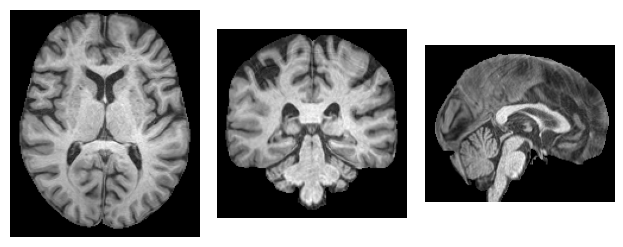

In [40]:
fig, axs = plt.subplots(1,3)
axs = axs.flatten()
axs[0].imshow(ndimage.rotate(X_volume[:,:,80], 90), cmap='gray')
axs[0].grid()
axs[0].axis('off')
axs[1].imshow(ndimage.rotate(X_volume[:,80,:], 90), cmap='gray')
axs[1].grid()
axs[1].axis('off')
axs[2].imshow(ndimage.rotate(X_volume[80,:,:], 90), cmap='gray')
axs[2].grid()
axs[2].axis('off')
plt.tight_layout()

In [41]:
X2 = np.copy(X_volume)

In [42]:
(X1==X2).all()

True

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
-> Returning WITH noise None
False
-0.0022286398 1.5294039 0.18017678 0.24336453
-0.981562667973917 1.6395221323612315 0.1803026217000556 0.3149725678972099


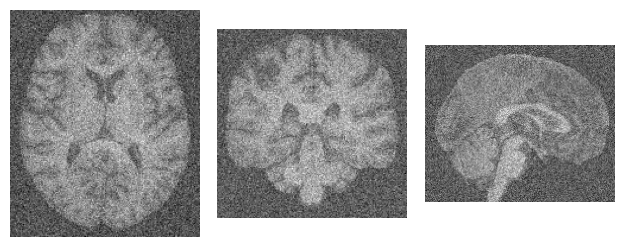

In [77]:
X_path = '../../../multi-age-mapper/additional_data_examples/' + subject_path + '/T1_brain_to_MNI.nii.gz'
X_volume = np.array(nib.load(X_path).dataobj)

crop_values = [10, 170, 12, 204, 0, 160]

X_volume = X_volume[crop_values[0]:crop_values[1],
                    crop_values[2]:crop_values[3], 
                    crop_values[4]:crop_values[5]]

X_volume = X_volume / X_volume.mean()

X_volume = X_volume / scale_factor

print(type(X_volume))

noise_transformation = AddGaussianNoise(mean=0., std=0.)

# Possible values = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, ]

if noise_transformation is not None:
    'NOISE WAS ADDED!!!'
    X_volume = noise_transformation(X_volume)

    

X_volume = torch.from_numpy(X_volume)

fig, axs = plt.subplots(1,3)
axs = axs.flatten()
axs[0].imshow(ndimage.rotate(X_volume[:,:,80], 90), cmap='gray')
axs[0].grid()
axs[0].axis('off')
axs[1].imshow(ndimage.rotate(X_volume[:,80,:], 90), cmap='gray')
axs[1].grid()
axs[1].axis('off')
axs[2].imshow(ndimage.rotate(X_volume[80,:,:], 90), cmap='gray')
axs[2].grid()
axs[2].axis('off')
plt.tight_layout()

X3 = np.copy(X_volume)
print((X1==X3).all())

print(X1.min(), X1.max(), X1.mean(), X1.std())
print(X3.min(), X3.max(), X3.mean(), X3.std())

In [ ]:
## print(X1.min(), X1.max(), X1.mean(), X1.std())
print(X3.min(), X3.max(), X3.mean(), X3.std())

In [ ]:
        if self.rsfmri_volume != None:
            X_volume = np.array(nib.load(self.X_paths[index]).dataobj)[:,:,:,self.rsfmri_volume]
        else:
            X_volume = np.array(nib.load(self.X_paths[index]).dataobj)

        X_volume = X_volume[self.crop_values[0]:self.crop_values[1],
                            self.crop_values[2]:self.crop_values[3], 
                            self.crop_values[4]:self.crop_values[5]]

        if self.non_deterministic_modality == True:
            X_volume = X_volume / X_volume.mean()

        X_volume = X_volume / self.scale_factor

        if self.mirror_transformation==True:
            prob = np.random.rand(1)
            if prob < 0.5:
                X_volume = np.flip(X_volume,0)

        if self.shift_transformation==True:
            x_shift, y_shift, z_shift = np.random.randint(-2,3,3)
            X_volume = np.roll(X_volume,x_shift,axis=0)
            X_volume = np.roll(X_volume,y_shift,axis=1)
            X_volume = np.roll(X_volume,z_shift,axis=2)
            if z_shift < 0:
                X_volume[:,:,z_shift:] = 0

        if self.noise_transformation is not None:
            X_volume = self.noise_transformation(X_volume)

        X_volume = torch.from_numpy(X_volume)
        y_age = np.array(self.y_ages[index])